# Fundamentos de Metodología Estadística



## Bases de datos
1. Para este trabajo vamos a usar los datos de [acá](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download)

2. El Sistema de Vigilancia de Factores de Riesgo del Comportamiento (BRFSS, por sus siglas en inglés) es una encuesta telefónica relacionada con la salud que los CDC recopilan anualmente. Cada año, la encuesta recopila respuestas de más de 400000 estadounidenses sobre comportamientos de riesgo relacionados con la salud, condiciones de salud crónicas y el uso de servicios preventivos. Se lleva a cabo todos los años desde 1984. Para este proyecto, se utilizó un csv del conjunto de datos disponible en Kaggle para el año 2015.
3. El [diabetes_BRFSS2015.csv](https://raw.githubusercontent.com/Cruzalirio/Unal-Enfermeria-/main/Datos/diabetes_BRFSS2015.csv) es un conjunto de datos limpio de 253680 respuestas a la encuesta BRFSS2015 de los CDC. La variable objetivo Diabetes_012 tiene 3 clases. 0 es sin diabetes o solo durante el embarazo, 1 es para prediabetes y 2 es para diabetes. Hay un desequilibrio de clases en este conjunto de datos. Este conjunto de datos tiene 21 variables de características

4. Descripción de las variables:


*   Diabetes_012: 0 = no diabetes, 1 = prediabetes, 2 = diabetes
*   HighBP: 0 = no high BP, 1 = high BP
*   HighChol: 0 = no high cholesterol, 1 = high cholesterol
*   CholCheck: 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years.
*   BMI: Body Mass Index
*   Smoker: Have you smoked at least 100 cigarettes in your entire life?(Note: 5 packs = 100 cigarettes) 0 = no, 1 = yes
*   Stroke:  (Ever told) you had a stroke. 0 = no, 1 = yes
*   HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes
*   PhysActivity: physical activity in past 30 days - not including job 0 = no, 1 = yes
*   Fruits: Consume Fruit 1 or more times per day 0 = no, 1 = yes
*   Veggies: Consume Vegetables 1 or more times per day 0 = no, 1 = yes
*   HvyAlcoholConsump: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes
*   AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes
*  NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes
*   GenHlth: Would you say that in general your health is: scale 1-5. 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor.
*  MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
*   PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
*    DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
*    Sex:  0 = female 1 = male
*    Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
*    Education:  Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
*   Income:  Income scale (INCOME2 see codebook) scale 1-8 1 = less than \$10,000 5 = less than \$35,000 8 = \$75,000 or more


In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Carga de datos

1. Descargar el archivo [de acá](https://github.com/Cruzalirio/Unal-Enfermeria-/blob/main/Datos/diabetes_BRFSS2015.csv)

In [ ]:
datos = read_csv("https://raw.githubusercontent.com/Cruzalirio/Unal-Enfermeria-/main/Datos/diabetes_BRFSS2015.csv")
### La función head me pe ver las primeras filas
head(datos)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


# Y si tenemos dos variables?



## Las dos son cualitativas nominales

**Tabla de contingencia**: Una tabla de contingencia es una herramienta utilizada en la rama de la estadística, la cual consiste en crear al menos dos filas y dos columnas para representar datos categóricos en términos de conteos de frecuencia.  Esta herramienta, que también se conoce como tabla cruzada o como tabla de dos vías, tiene el objetivo de representar en un resumen, la relación entre diferentes variables categóricas. 

Por ejemplo, tomemos la presión arterial alta, con el colesterol alto.

### Tabla cruzada en R

In [ ]:
## Forma 1
tabla = table(datos$HighBP, datos$HighChol)
tabla

   
         0      1
  0 101920  42931
  1  44169  64660

In [ ]:
## Agreguemosle más cosas
colnames(tabla) = c("Colesterol alto", "Colesterol normal")
rownames(tabla) = c("Presión alta", "Presión normal")
tabla

                
                 Colesterol alto Colesterol normal
  Presión alta            101920             42931
  Presión normal           44169             64660

In [ ]:
## Forma 2
tabla1 = datos %>% group_by(HighBP, HighChol) %>% summarise(Conteo=n())
tabla1

`summarise()` has grouped output by 'HighBP'. You can override using the
`.groups` argument.


HighBP,HighChol,Conteo
<dbl>,<dbl>,<int>
0,0,101920
0,1,42931
1,0,44169
1,1,64660


### Gráfica

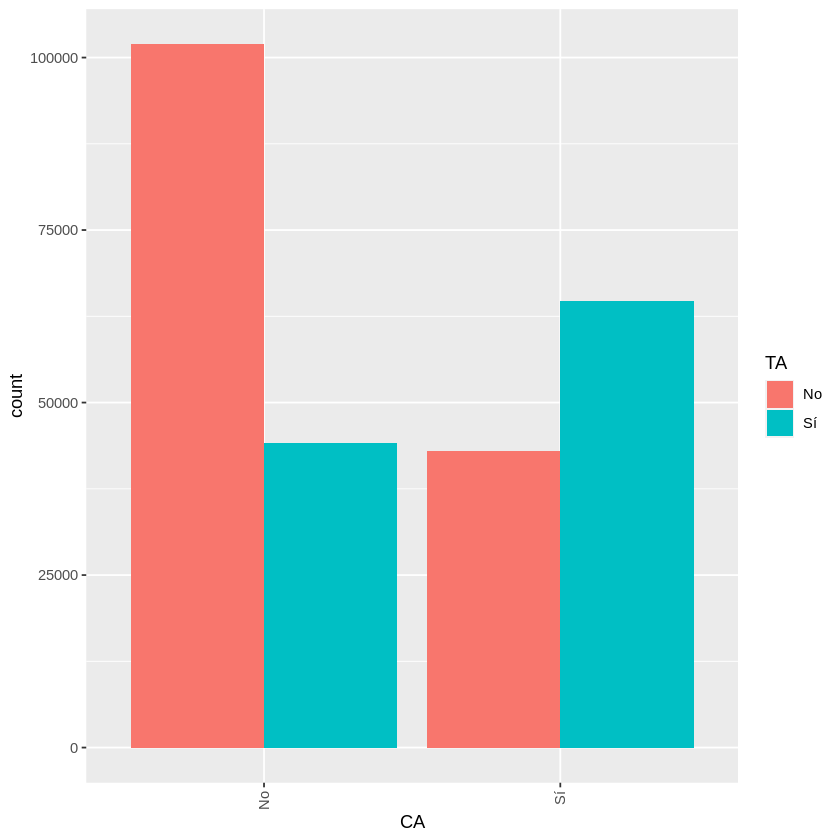

In [ ]:
## Grafico al lado
## Primero vamos a solucionar lo de los sí y no
datos1 = datos %>% mutate(TA = ifelse(HighBP==0, "No", "Sí"),
                         CA = ifelse(HighChol==0, "No", "Sí"))

ggplot(datos1, aes(fill=TA, x=CA))+ geom_bar(position = "dodge")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


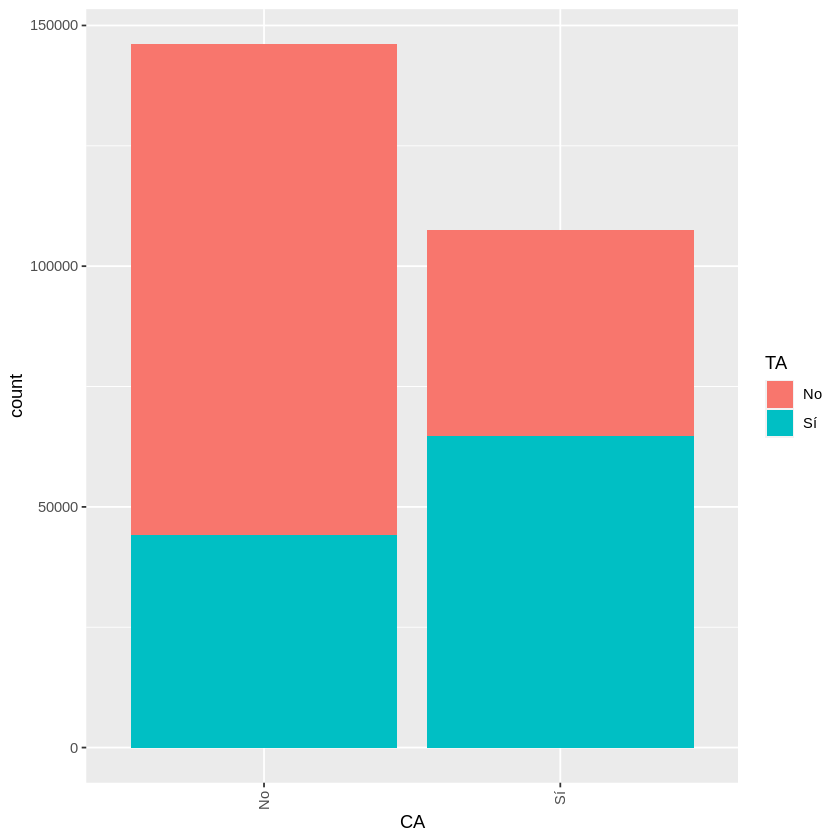

In [ ]:
## Grafico de barras, pero apiladas
ggplot(datos1, aes(fill=TA, x=CA))+ geom_bar(position = "stack")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

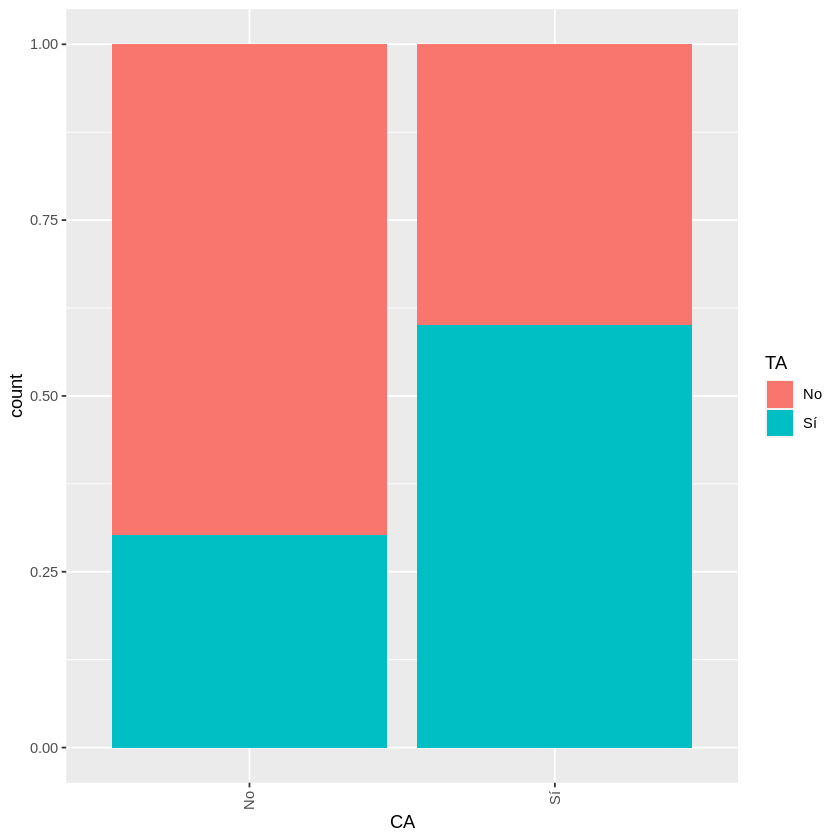

In [ ]:
## Grafico de barras, pero apiladas con porcentaje
ggplot(datos1, aes(fill=TA, x=CA))+ geom_bar(position = "fill")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

## Y si son ordinales?

### Percepción de salud vs ingreso
1. Tomaremos la variable GenHlt e Income.
2. Es bueno convertirlas a factor para que R las reconozco como caracter ordinal.

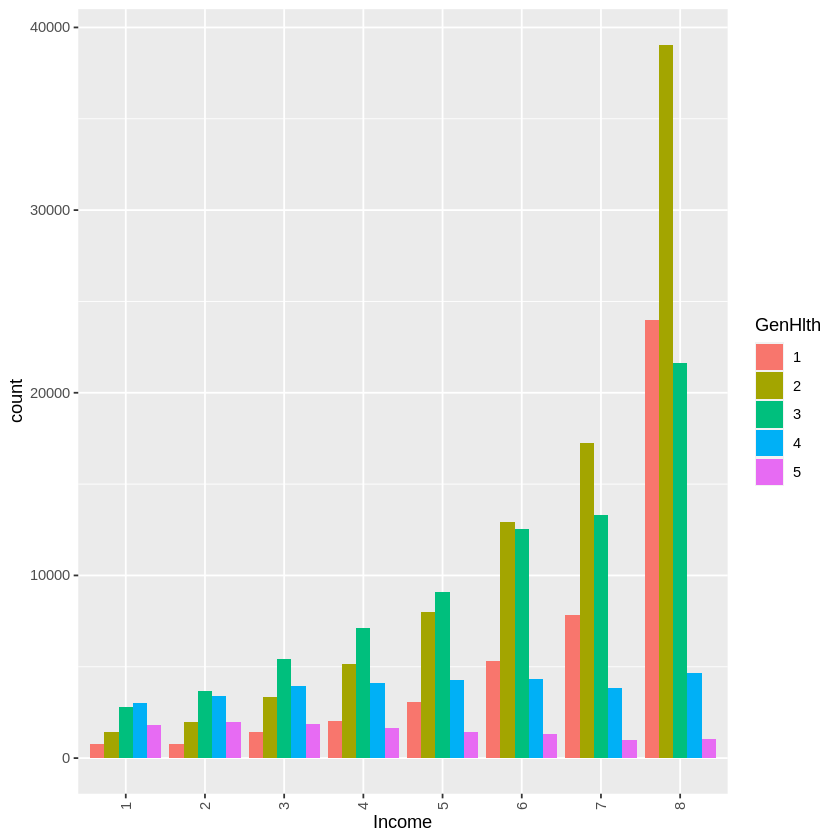

In [ ]:
## Grafico al lado
## Primero vamos a solucionar lo de los sí y no
datos1 = datos %>% mutate(GenHlth = factor(GenHlth),
                         Income = factor(Income))

ggplot(datos1, aes(fill=GenHlth, x=Income))+ geom_bar(position = "dodge")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


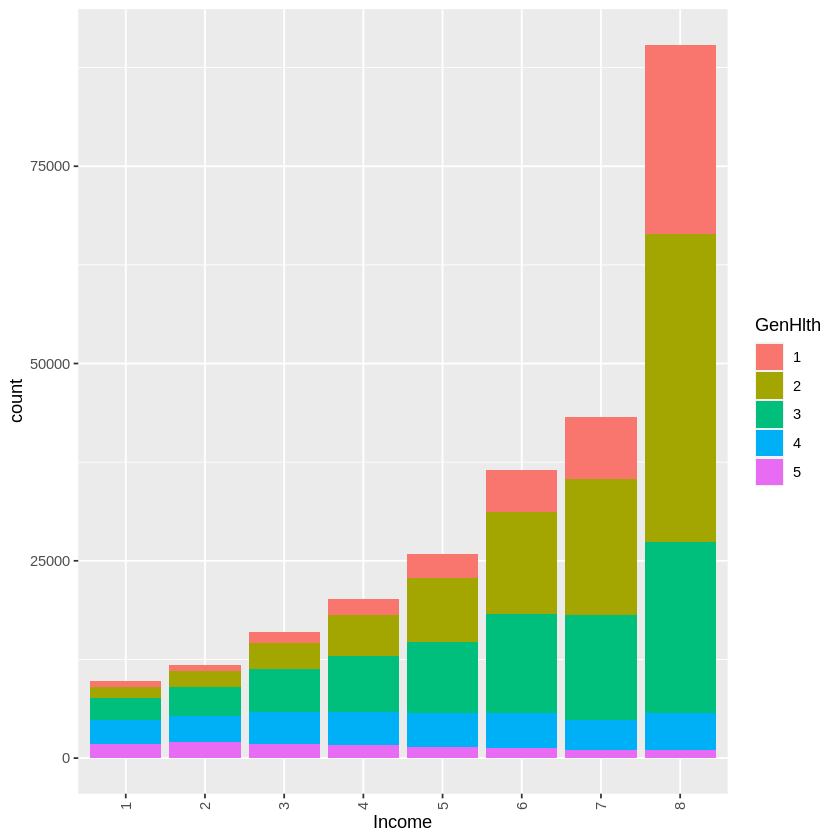

In [ ]:
ggplot(datos1, aes(fill=GenHlth, x=Income))+ geom_bar(position = "stack")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

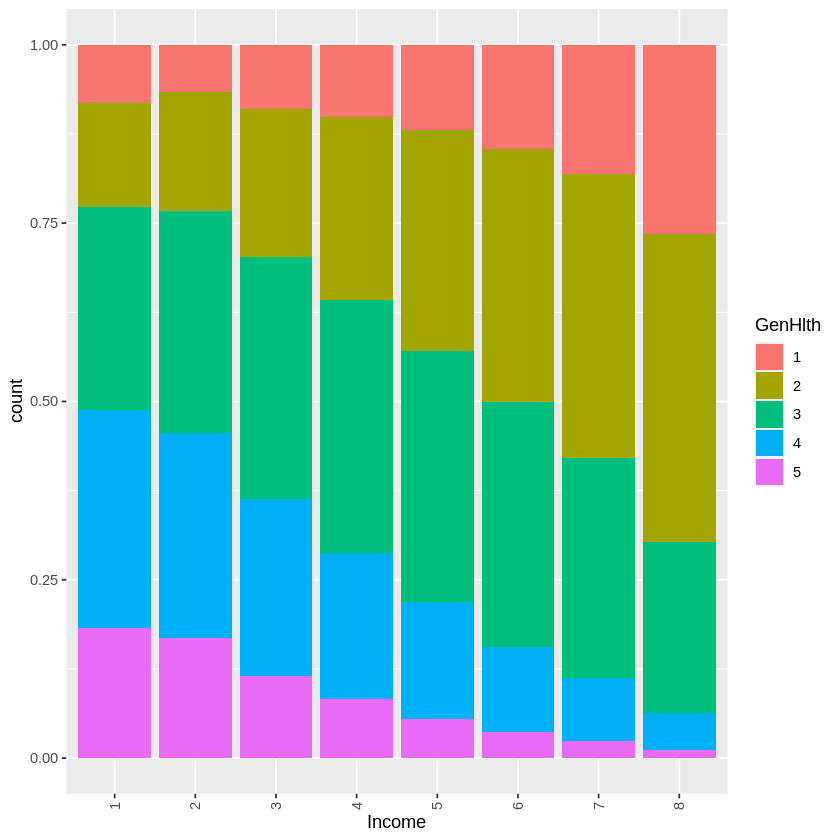

In [ ]:
ggplot(datos1, aes(fill=GenHlth, x=Income))+ geom_bar(position = "fill")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

## Ordinal y nominal

### Percepción de salud y actividad física

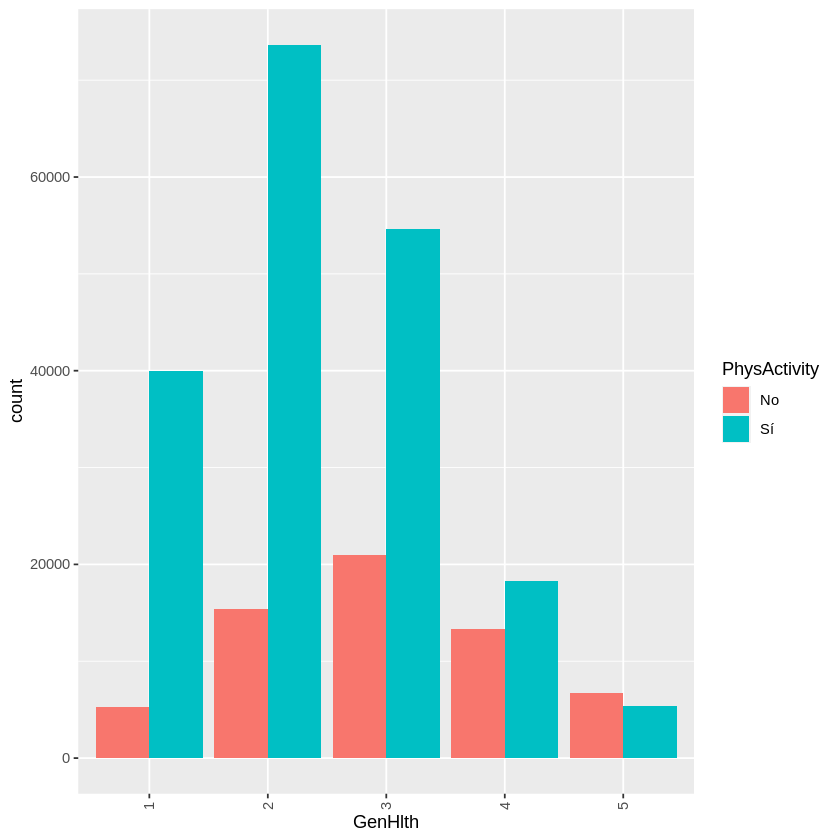

In [ ]:
## Grafico al lado
## Primero vamos a solucionar lo de los sí y no
datos1 = datos %>% mutate(GenHlth = factor(GenHlth),
                         PhysActivity = ifelse(PhysActivity==0, "No", "Sí"))

ggplot(datos1, aes(fill=PhysActivity, x=GenHlth))+ geom_bar(position = "dodge")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


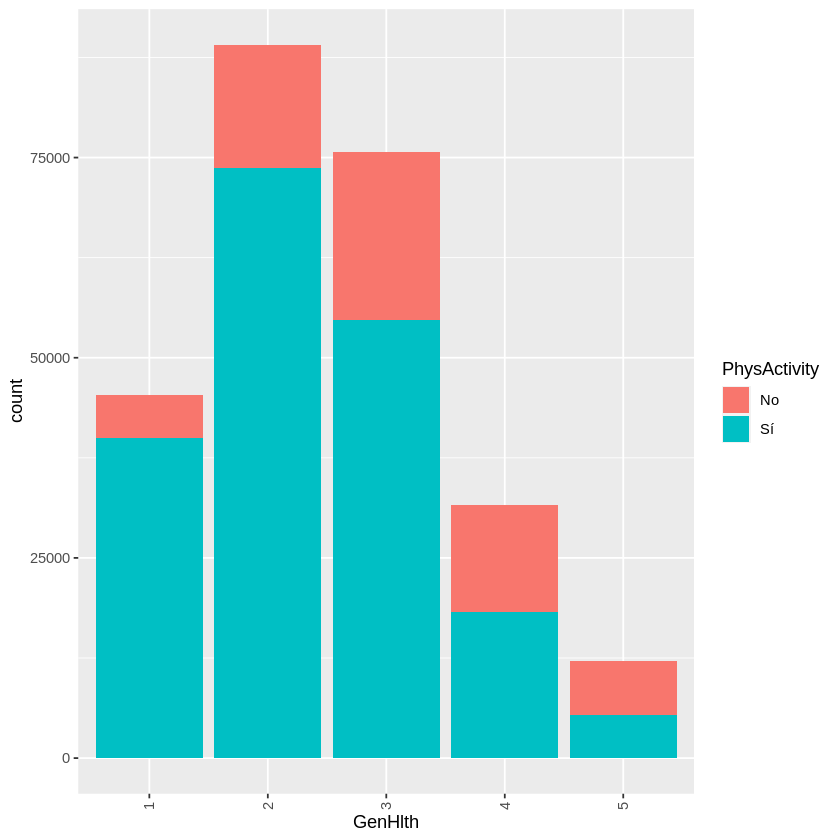

In [ ]:
ggplot(datos1, aes(fill=PhysActivity, x=GenHlth))+ geom_bar(position = "stack")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

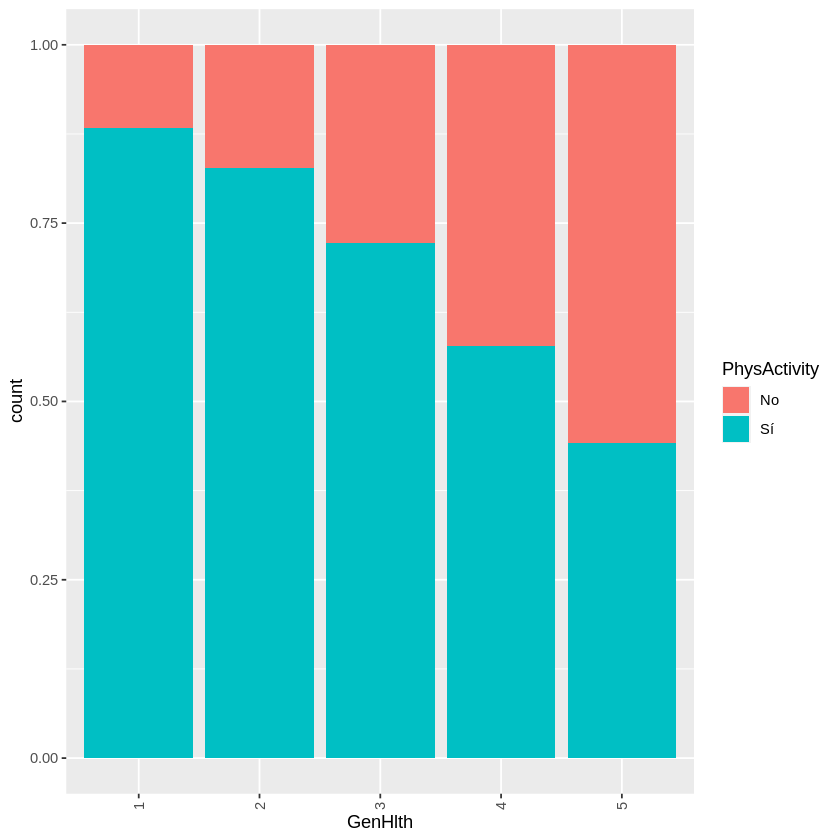

In [ ]:
ggplot(datos1, aes(fill=PhysActivity, x=GenHlth))+ geom_bar(position = "fill")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

¿Cómo se podía medir esa relación?

1. Se acuerdan de la paradoja de Simpson?

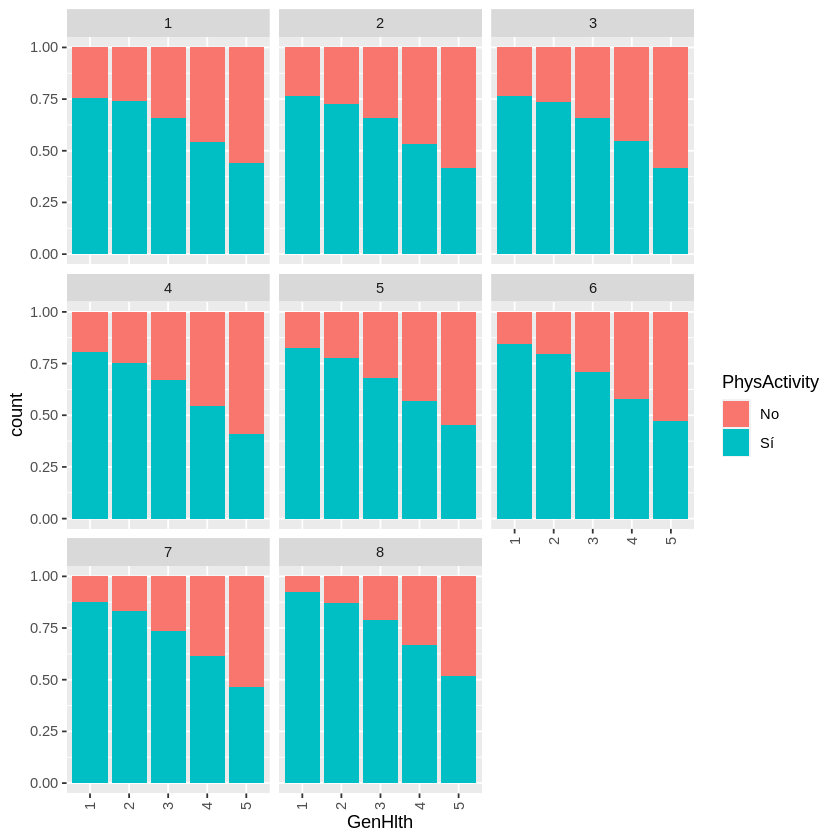

In [ ]:
ggplot(datos1, aes(fill=PhysActivity, x=GenHlth))+ geom_bar(position = "fill")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
facet_wrap(.~Income)

## Y si es una cualitativa y una cuantitativa

1. Se pueden calcular medias, medianas y varianzas por cada grupo de la cualitativa.

2. Se pueden hacer boxplots y densidades por cada grupo.

In [ ]:
datos %>% group_by(GenHlth) %>% summarise(Media=mean(BMI), Mediana =median(BMI),
  varianza = var(BMI), Min=min(BMI), max=max(BMI))

GenHlth,Media,Mediana,varianza,Min,max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25.76662,25,26.27835,13,95
2,27.64223,27,33.47630,12,98
3,29.51010,28,44.80671,12,98
4,30.68514,29,61.46582,13,98
5,30.56908,29,74.24839,12,98


### Boxplot

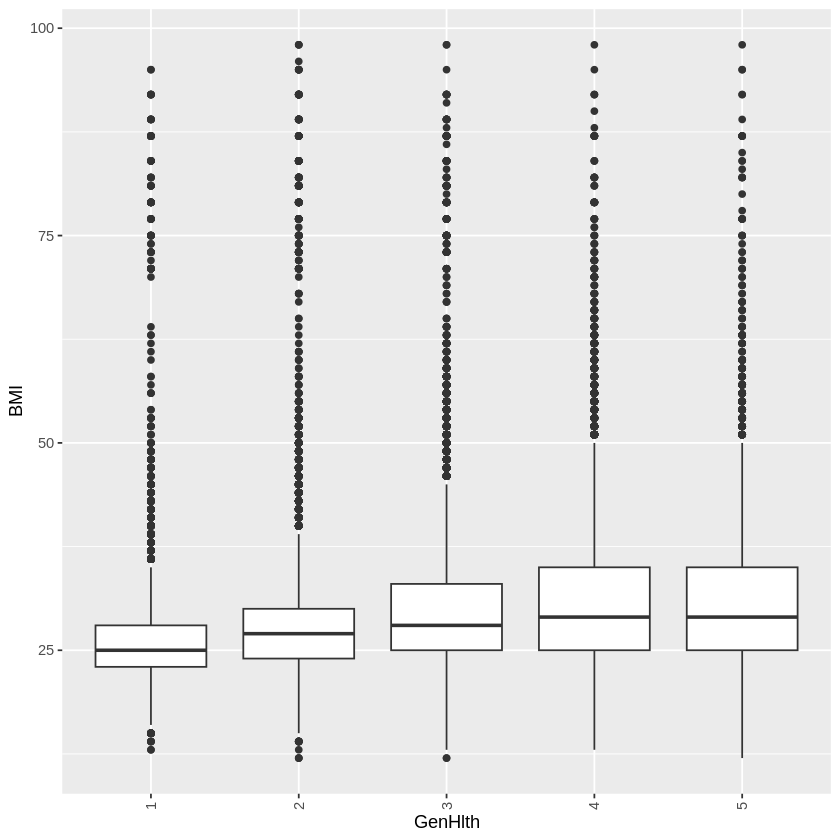

In [ ]:
datos1 = datos %>% mutate(GenHlth = factor(GenHlth),
                         PhysActivity = ifelse(PhysActivity==0, "No", "Sí"))

ggplot(datos1, aes(y=BMI, x=GenHlth))+ geom_boxplot()+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

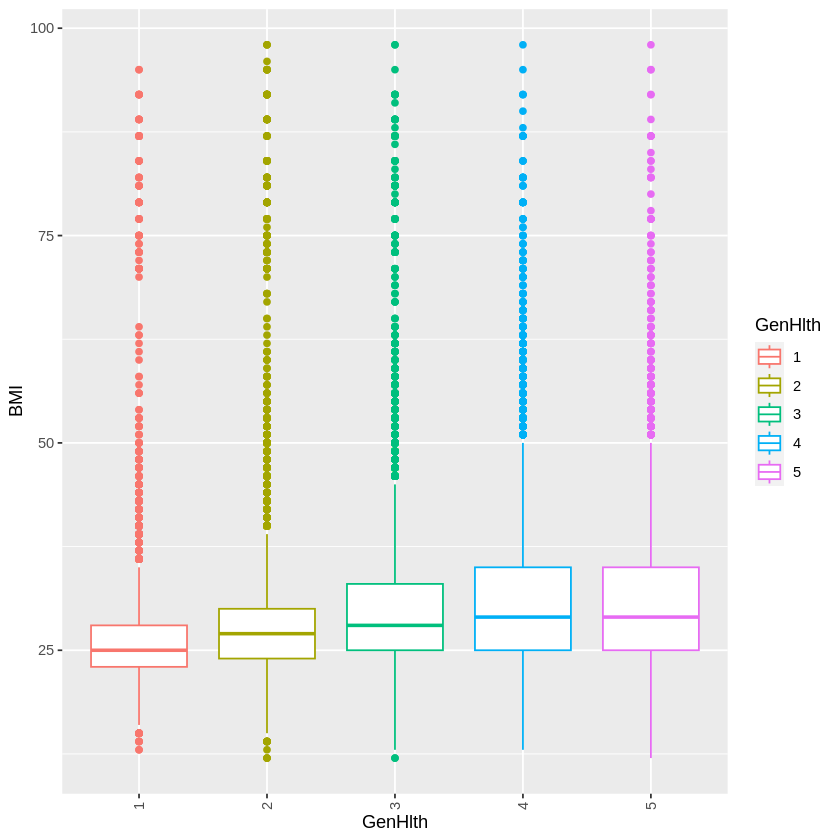

In [ ]:
datos1 = datos %>% mutate(GenHlth = factor(GenHlth),
                         PhysActivity = ifelse(PhysActivity==0, "No", "Sí"))

ggplot(datos1, aes(y=BMI, x=GenHlth, color = GenHlth))+ geom_boxplot()+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

### Densidad

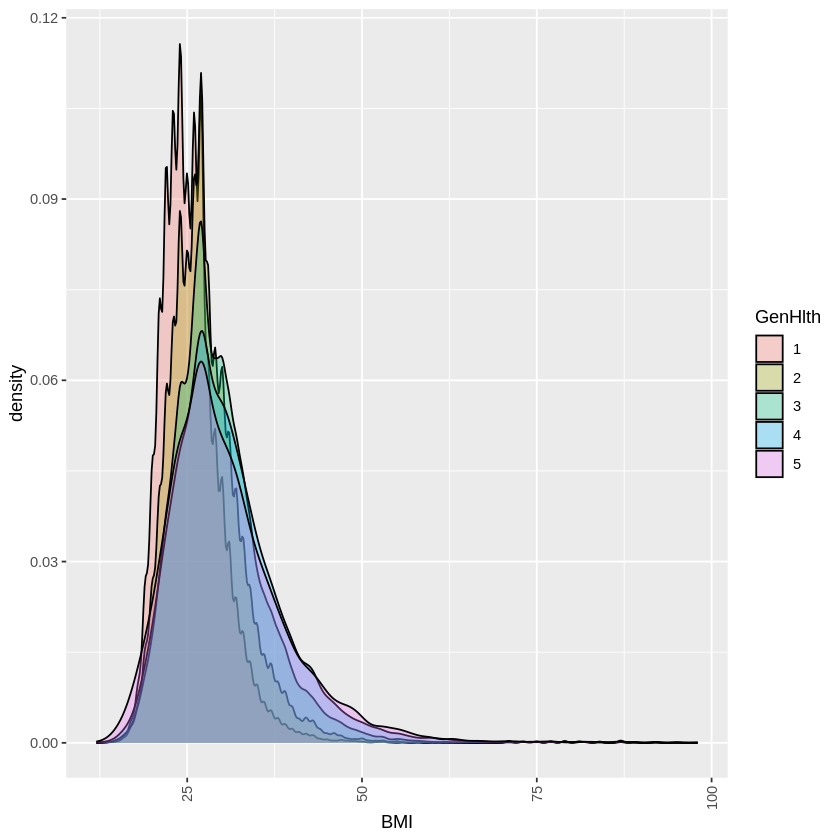

In [ ]:
datos1 = datos %>% mutate(GenHlth = factor(GenHlth),
                         PhysActivity = ifelse(PhysActivity==0, "No", "Sí"))

ggplot(datos1, aes(x=BMI, fill = GenHlth))+ geom_density(alpha=0.3)+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

## Y las dos cuantitativas

1. MentHlth: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
2. PhysHlth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
3. BMI

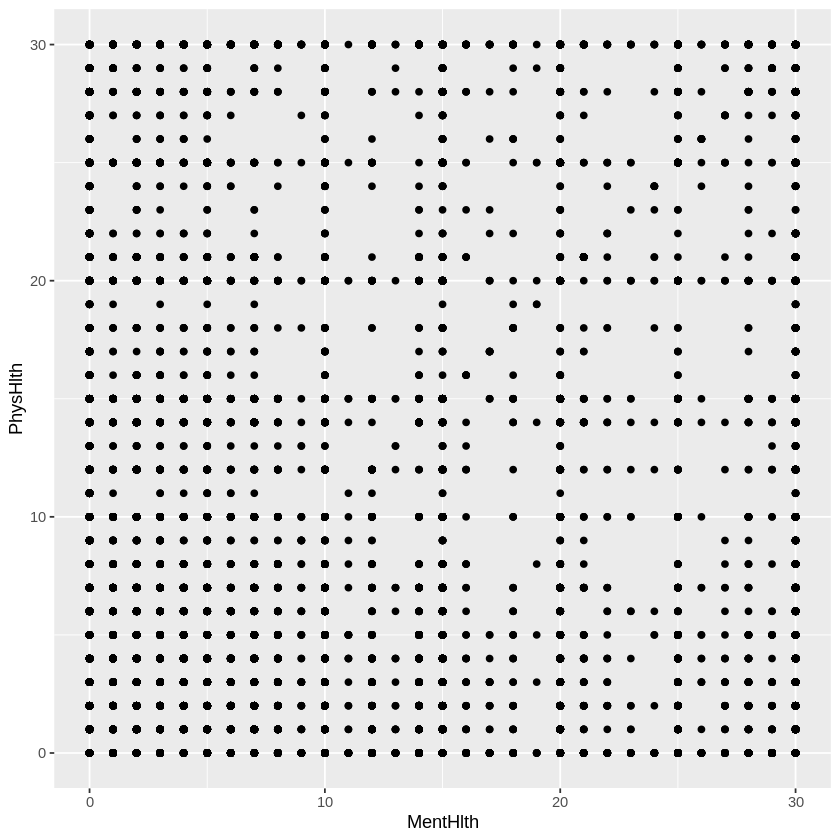

In [ ]:
ggplot(datos, aes(x=MentHlth, y=PhysHlth))+ geom_point()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


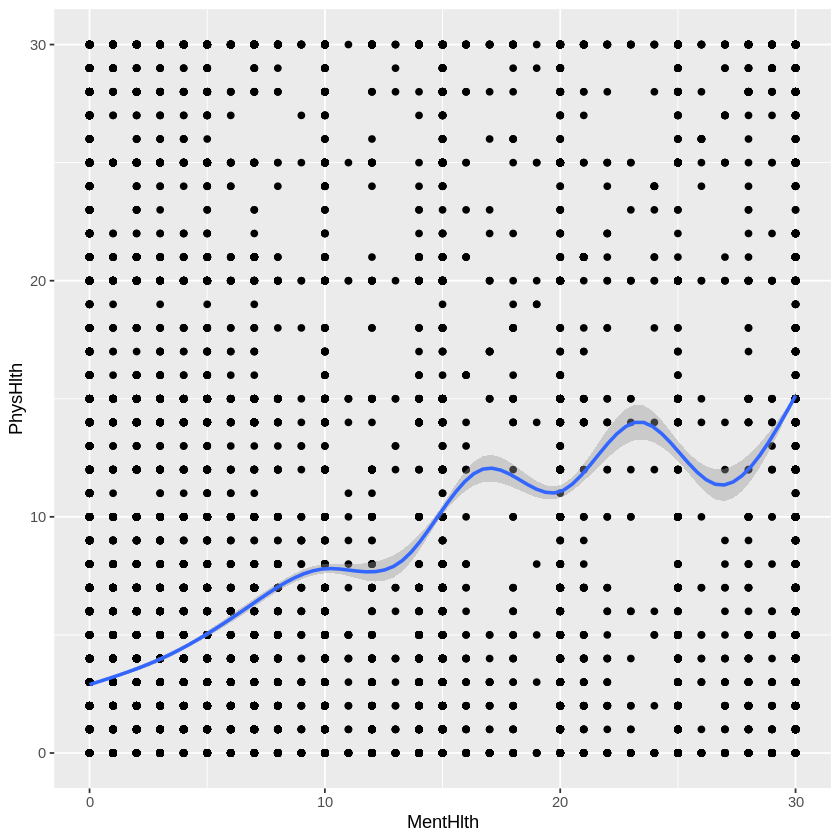

In [ ]:
ggplot(datos, aes(x=MentHlth, y=PhysHlth))+ geom_point()+
  geom_smooth()

### ¿Qué problemas puede haber?

In [ ]:
medias = datos %>% group_by(MentHlth) %>% summarise(SaludFisica=mean(PhysHlth), Desviacion=sd(PhysHlth))
medias

MentHlth,SaludFisica,Desviacion
<dbl>,<dbl>,<dbl>
0,2.920856,7.352206
1,2.451277,5.685938
2,3.650299,7.438487
3,3.964232,7.699123
4,4.220111,7.913144
5,5.588926,9.044677
6,5.541498,8.816909
7,5.509032,8.801287
8,5.638498,8.471924


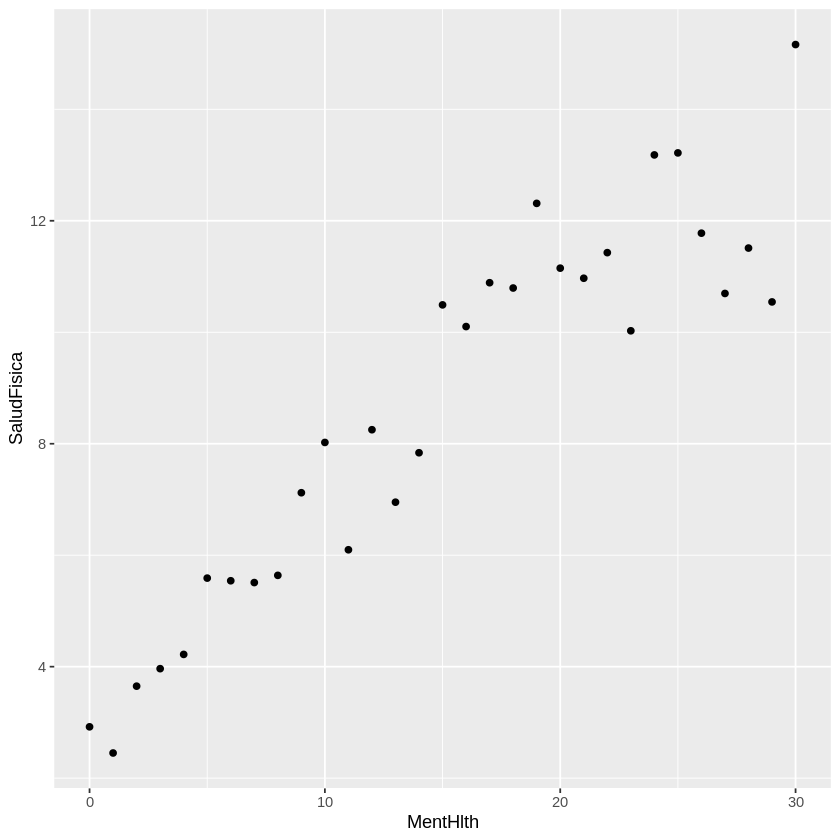

In [ ]:
ggplot(medias, aes(x=MentHlth, y=SaludFisica))+geom_point()

### Gráfico de contorno

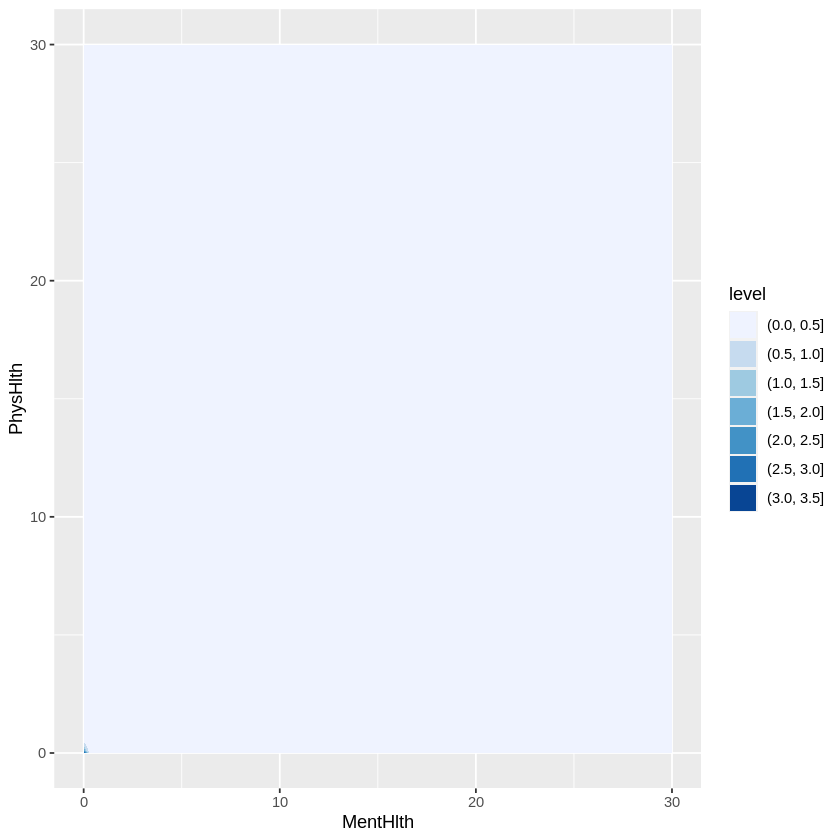

In [ ]:
 ggplot(datos, aes(x=MentHlth, y=PhysHlth))+
 geom_density_2d_filled() +
  scale_fill_brewer()